# Build Decision Tree Classifier on Iris Dataset

In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.model_selection import cross_val_score

## Import Dataset 

In [101]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
len(X), len(y)

(150, 150)

## Choose A Decision Tree Model 

In [102]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

np.random.seed(42)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model 
clf = DecisionTreeClassifier()

# Fit the model 
clf = clf.fit(X_train, y_train)

clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [103]:
y_pred = clf.predict(X_test)

In [104]:
len(X_train), len(X_test)

(120, 30)

In [105]:
np.array(y_test)
# print(y_pred)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [109]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

np.random.seed(42)

clf = DecisionTreeClassifier(random_state=0)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(clf,X,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.960
Precisoin score : 0.964
Recall score : 0.960
F1 score : 0.960


## Hyperparameter Tuning 

In [111]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = DecisionTreeClassifier().fit(X_train, y_train)
    print(f"Model accruacy on test set: {model.score(X_test, y_test)}")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 1.0

Trying model with 20 estimators...
Model accruacy on test set: 1.0

Trying model with 30 estimators...
Model accruacy on test set: 1.0

Trying model with 40 estimators...
Model accruacy on test set: 1.0

Trying model with 50 estimators...
Model accruacy on test set: 1.0

Trying model with 60 estimators...
Model accruacy on test set: 1.0

Trying model with 70 estimators...
Model accruacy on test set: 1.0

Trying model with 80 estimators...
Model accruacy on test set: 1.0

Trying model with 90 estimators...
Model accruacy on test set: 1.0



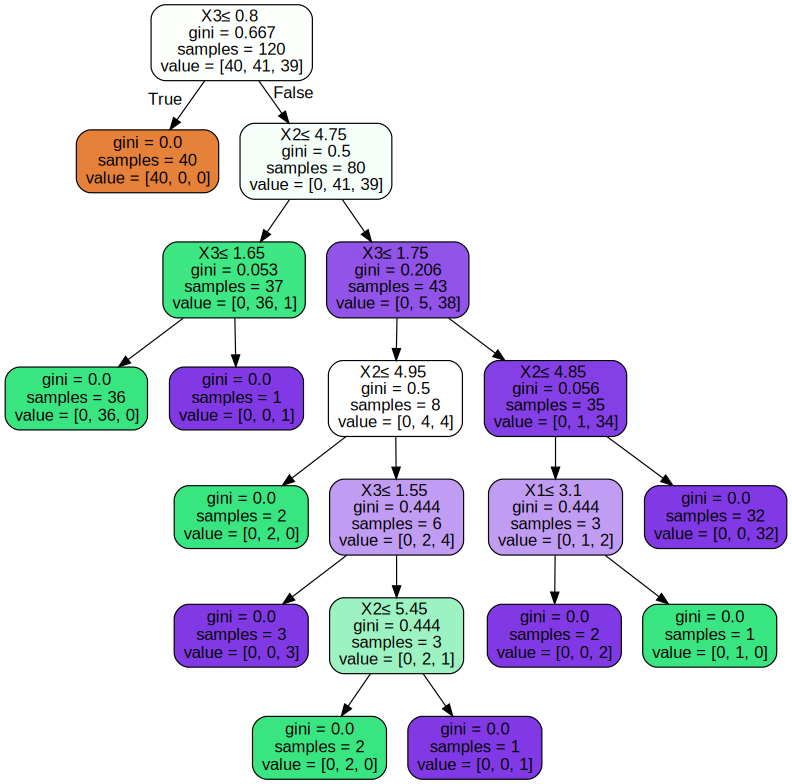

In [67]:
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(clf.fit(X_train, y_train),out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"11,12!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

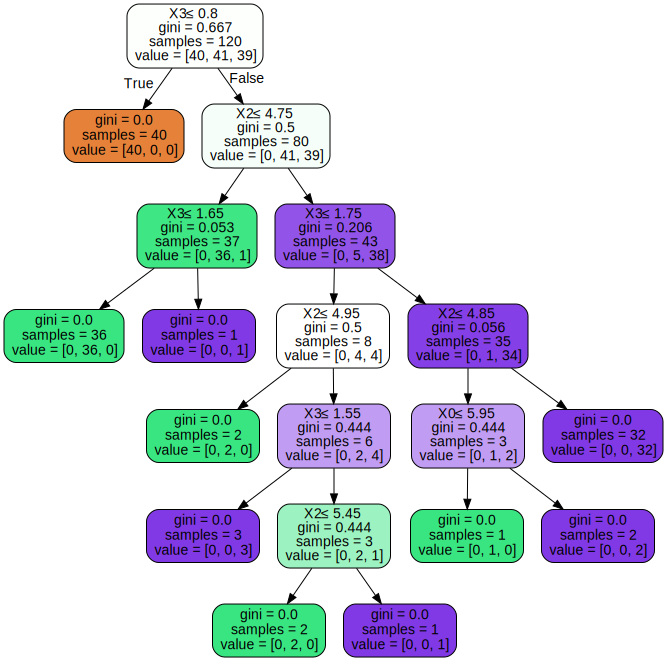

In [64]:
dot_data = tree.export_graphviz(clf.fit(X_train,y_train), out_file=None,   
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 